In [18]:
import requests
import json
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

### API request

In [ ]:
url = "https://v3.football.api-sports.io/odds"
params = {'league': 39, 'season': 2023,'date':'2023-12-30'}
headers = {
    'x-rapidapi-host': "v3.football.api-sports.io",
    'x-rapidapi-key': "your-api-key"
}

response = requests.get(url, headers=headers, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    print("Request was successful!")
    data = response.json()
    
    # Save the response data to a file with a timestamp in the filename for unique identification
    timestamp = datetime.now().strftime("%Y%M%D%H%M%S")
    filename = f'bets_{timestamp}.json'
    
    with open(filename, 'w') as json_file:
        json.dump(data, json_file, indent=2)  

elif response.status_code == 404:
    print("Resource not found. Please check the URL.")

# Check if the status code is 401 (Unauthorized)
elif response.status_code == 401:
    print("Unauthorized access. Please check your authentication credentials.")

# Handle the case where the request was not successful (status code is not 200, 404, 401, etc.)
else:
    print(f"Request failed with status code: {response.status_code}")
    print("Response Text:", response.text)  # For further investigation of the issue

In [37]:
with open('bets_20231231182057.json', 'r') as file:
    df=json.load(file)

### Preview of the JSON response

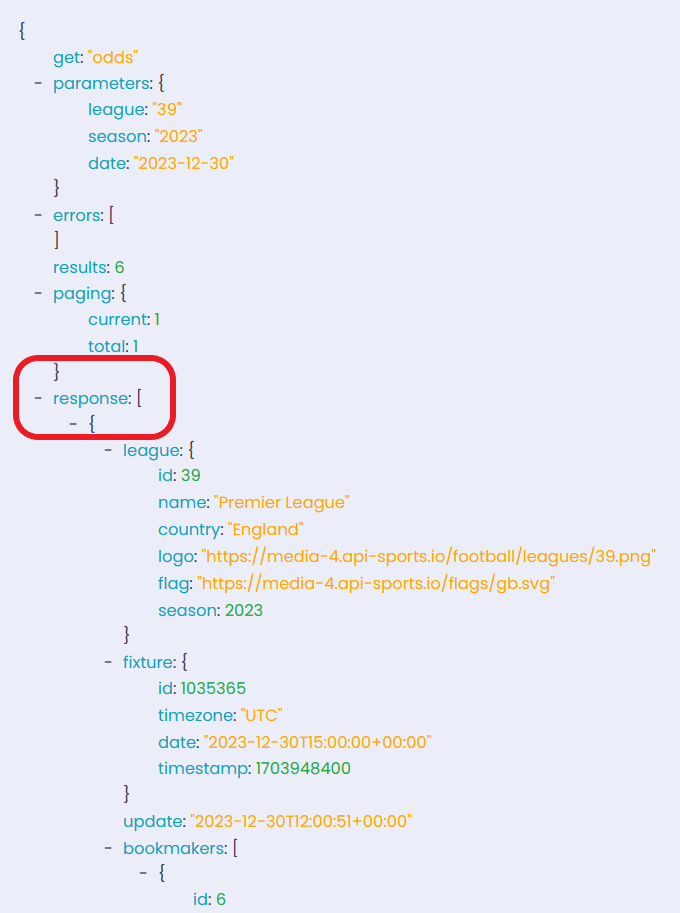

### **Data Transformation**
- #### Extracting key information from the JSON, found within the **"response"** array, and transforming it into a DataFrame.

In [38]:
df = df['response']
df = pd.DataFrame(df)
df 

,league,fixture,update,bookmakers
0,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035365, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
1,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035364, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
2,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035373, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
3,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035369, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
4,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035368, 'timezone': 'UTC', 'date': '20...",2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."
5,"{'id': 39, 'name': 'Premier League', 'country'...","{'id': 1035370, 'timezone': 'UTC', 'date': '20...",2023-12-30T16:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ..."


### The **"json_normalize"** function is used to normalize semi-structured JSON data into a flat table. This function is particularly useful when dealing with nested JSON structures.

In [21]:
df = json_normalize(json.loads(df.to_json(orient='records')))
df.head() 

,update,bookmakers,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp
0,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400
1,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035364,UTC,2023-12-30T15:00:00+00:00,1703948400
2,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035373,UTC,2023-12-30T15:00:00+00:00,1703948400
3,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035369,UTC,2023-12-30T15:00:00+00:00,1703948400
4,2023-12-30T12:00:51+00:00,"[{'id': 6, 'name': 'Bwin', 'bets': [{'id': 1, ...",39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035368,UTC,2023-12-30T12:30:00+00:00,1703939400


### The **"explode"** function is used to transform a column with lists or arrays of values into separate rows, duplicating the other columns accordingly.
- #### Exploding the **"bookmakers"** column and normalizing.

In [22]:
df = df.explode('bookmakers')
df = json_normalize(json.loads(df.to_json(orient='records')))
df.head()

,update,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp,bookmakers.id,bookmakers.name,bookmakers.bets
0,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
1,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,27,NordicBet,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
2,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,1,10Bet,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
3,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,7,William Hill,"[{'id': 1, 'name': 'Match Winner', 'values': [..."
4,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,8,Bet365,"[{'id': 1, 'name': 'Match Winner', 'values': [..."


### Exploding and normalizing the newly generated columns.

In [23]:
df = df.explode('bookmakers.bets')
df = json_normalize(json.loads(df.to_json(orient='records')))
df = df.explode('bookmakers.bets.values')
df = json_normalize(json.loads(df.to_json(orient='records')))
df.head()

,update,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp,bookmakers.id,bookmakers.name,bookmakers.bets.id,bookmakers.bets.name,bookmakers.bets.values.value,bookmakers.bets.values.odd
0,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Home,2.20
1,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Draw,3.20
2,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Away,3.40
3,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Home,1.52
4,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Away,2.35


### We can implement a function based on the previous steps:

In [39]:
def explode_normalize(df):
    while True:
        # Convert DataFrame to JSON and normalize
        df = pd.json_normalize(json.loads(df.to_json(orient='records')))
        
        # Get list of nested columns
        nested_columns = [col for col in df.columns if isinstance(df[col][0], list)]
        
        # If there are no more nested columns, break out of the loop
        if not nested_columns:
            break
        
        # Explode the first nested column
        df = df.explode(nested_columns[0])
    
    return df

explode_normalize(df)

,update,league.id,league.name,league.country,league.logo,league.flag,league.season,fixture.id,fixture.timezone,fixture.date,fixture.timestamp,bookmakers.id,bookmakers.name,bookmakers.bets.id,bookmakers.bets.name,bookmakers.bets.values.value,bookmakers.bets.values.odd
0,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Home,2.20
1,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Draw,3.20
2,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,1,Match Winner,Away,3.40
3,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Home,1.52
4,2023-12-30T12:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035365,UTC,2023-12-30T15:00:00+00:00,1703948400,6,Bwin,2,Home/Away,Away,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,130,Corners 1x2 (1st Half),Away,2.07
29794,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,125,Corners Asian Handicap (1st Half),Home +0,2.07
29795,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,125,Corners Asian Handicap (1st Half),Away +0,1.77
29796,2023-12-30T16:00:51+00:00,39,Premier League,England,https://media-4.api-sports.io/football/leagues...,https://media-4.api-sports.io/flags/gb.svg,2023,1035370,UTC,2023-12-30T17:30:00+00:00,1703957400,9,Dafabet,125,Corners Asian Handicap (1st Half),Home +0.25,1.89


### **Data Transformation**
- #### Removing unnecessary columns and renaming the remaining ones.

In [25]:
df.drop(['update','league.id','league.name','league.country',
         'league.logo','league.flag','league.season','fixture.date',
         'fixture.timezone','fixture.timestamp'],
          axis=1,inplace=True)

df.rename(columns={'fixture.id':'fixture_id',
                   'bookmakers.name':'bookmaker',
                   'bookmakers.id':'bookmaker_id',
                   'bookmakers.bets.id':'bet_id',
                   'bookmakers.bets.name':'bet_market',
                   'bookmakers.bets.values.value':'bet_outcome',
                   'bookmakers.bets.values.odd':'odds'},
                    inplace=True)

### **Data Exploration**

In [26]:
print(f'''There are {df.shape[0]} bets across {df.bet_market.nunique()} betting markets in the dataset involving {df.fixture_id.nunique()} Premier League matches 
that were played on December 30th.''')
print(f'There are {df.bookmaker.nunique()} bookmakers represented in the dataset:')
pd.DataFrame(df.bookmaker.unique()).set_index(0)                                                                    

There are 29798 bets across 183 betting markets in the dataset involving 6 Premier League matches 
that were played on December 30th.
There are 19 bookmakers represented in the dataset:


""
0
Bwin
NordicBet
10Bet
William Hill
Bet365
Marathonbet
Unibet
Betfair
Betsson


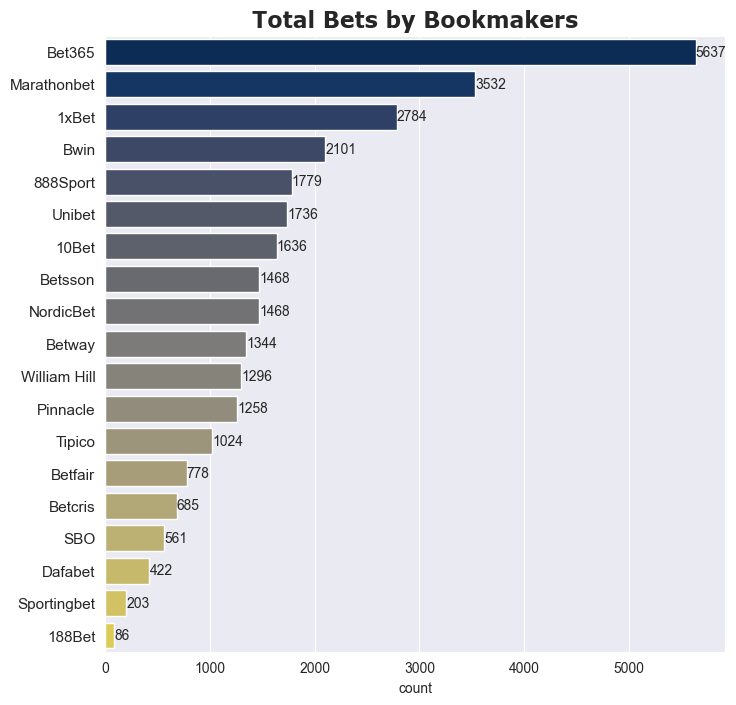

In [27]:
total_bets = df['bookmaker'].value_counts().reset_index()

plt.figure(figsize=(8, 8))
sns.set_style('darkgrid')
ax=sns.barplot(x='count', y='bookmaker',data=total_bets, palette='cividis',hue='bookmaker')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height()/2),
                va='center')
plt.ylabel(None)
plt.title('Total Bets by Bookmakers',fontdict={'fontsize':16,'fontweight':'bold','fontfamily':'Verdana'})
ax.tick_params(axis='y', labelsize=11)
plt.show()

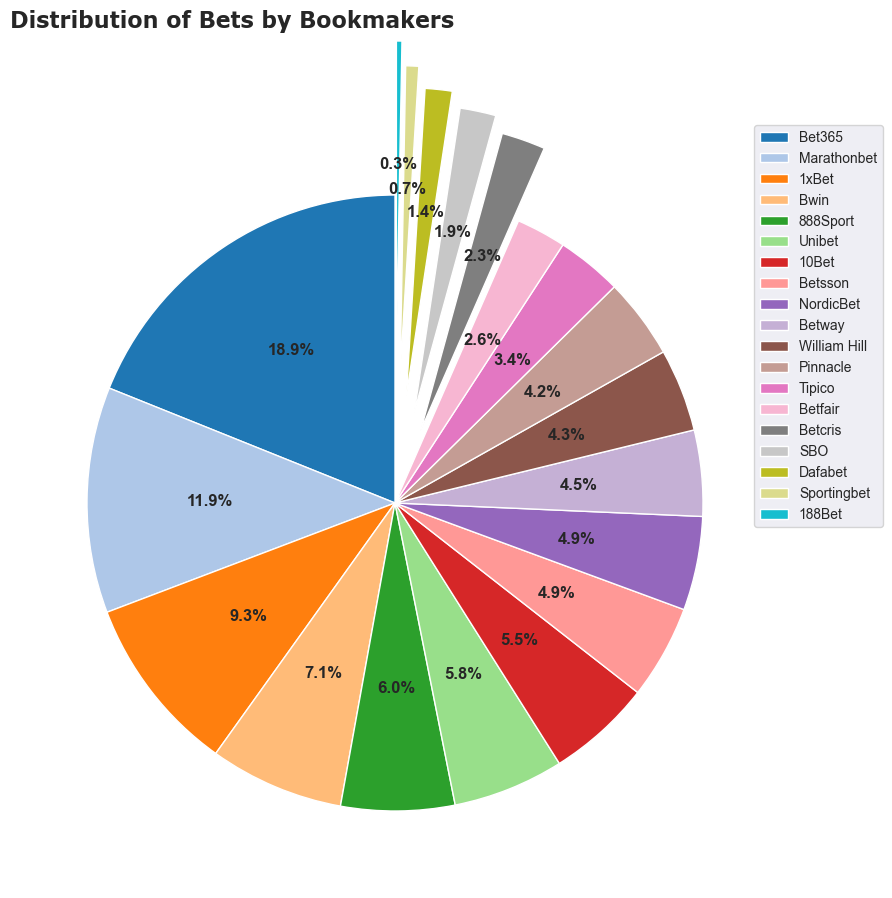

In [28]:
total_bets2 = df['bookmaker'].value_counts()

plt.figure(figsize=(10, 10))
sns.set_palette(sns.color_palette("tab20"))
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,0.3,0.35,0.42,0.5)
plt.pie(x=total_bets2.values,labels=total_bets2.index,autopct='%1.1f%%',startangle=90,
        labeldistance=None,explode=explode,textprops={'fontsize':12,'fontweight':'bold'})
plt.title('Distribution of Bets by Bookmakers', loc='left',pad=65,
          fontdict={'fontsize':16,'fontweight':'bold','fontfamily':'Verdana'})
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper center')
plt.show()

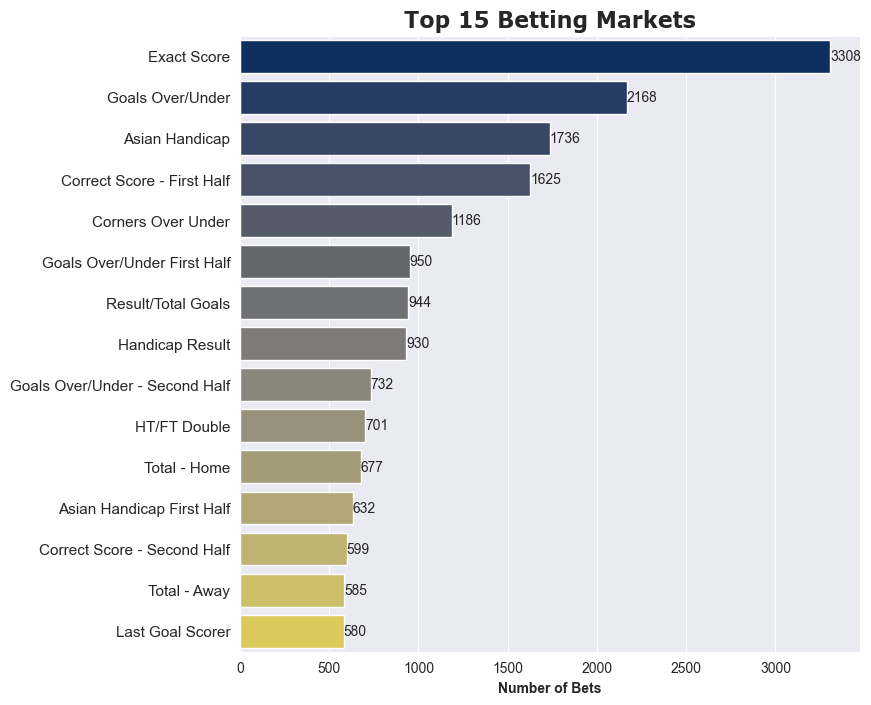

In [29]:
bet_market_count = df['bet_market'].value_counts().reset_index().head(15)

plt.figure(figsize=(8, 8))
ax=sns.barplot(x='count', y='bet_market',data=bet_market_count,palette='cividis',hue='bet_market')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(),p.get_y() + p.get_height()/2),va='center')

plt.title('Top 15 Betting Markets',fontdict={'fontsize':16,'fontweight':'bold','fontfamily':'Verdana'})
plt.xlabel('Number of Bets',fontdict={'fontweight':'bold'})
plt.ylabel(None)
ax.tick_params(axis='y', labelsize=11)
plt.show()

### **Bookmaker ranking**
- #### In this example I create a ranking of the bookmakers based on their odds offered for **Both Teams To Score: Yes**, which is a popular betting option.

In [30]:
df_test = df.query('bet_market == "Both Teams Score" & bet_outcome == "Yes"')
df_test = df_test.groupby(['fixture_id','bookmaker','odds']).size().reset_index()
df_test.drop(columns=(0),inplace=True)
df_test

,fixture_id,bookmaker,odds
0,1035364,10Bet,1.62
1,1035364,188Bet,1.71
2,1035364,1xBet,1.70
3,1035364,888Sport,1.76
4,1035364,Bet365,1.70
...,...,...,...
97,1035373,Pinnacle,1.78
98,1035373,Sportingbet,1.70
99,1035373,Tipico,1.65
100,1035373,Unibet,1.74


### Creating a matrix to represent the odds for each fixture:
- #### If the bet is unavailable at a particular bookmaker, the value is set to NaN.
- #### If a fixture doesn't feature a minimum of 1 bet, it is excluded from the matrix. (columns)
- #### If a bookmaker doesn't offer the bet for a minimum of 1 fixture, it is excluded from the matrix. (rows)  
  
    
      
      


In [31]:
df_test = df_test.pivot(index='bookmaker', columns='fixture_id', values='odds')
df_test

fixture_id,1035364,1035365,1035368,1035369,1035370,1035373
bookmaker,,,,,,
10Bet,1.62,1.80,1.57,2.55,1.50,1.67
188Bet,1.71,1.88,1.66,2.85,1.57,1.77
1xBet,1.70,1.88,1.66,2.74,1.57,1.76
888Sport,1.76,1.91,1.68,2.48,1.61,1.74
Bet365,1.70,1.95,1.67,2.63,1.57,1.75
Betcris,1.70,1.90,1.68,2.65,1.58,1.75
Betfair,1.77,1.98,1.73,2.90,1.67,1.82
Betsson,1.70,1.90,1.64,2.77,1.57,1.76
Betway,1.70,1.88,1.67,2.70,1.60,1.75


### Applying the rank function
- #### The function assigns ranks to the odds in ascending order, with the best (highest) odds receiving 1.
- #### In case of ties where the odds are equal, the assigned rank is the same.
- #### NaN values receive the lowest rank.


In [32]:
df_test = df_test[df_test.columns].rank(ascending=False,method='dense',na_option='bottom')
df_test 

fixture_id,1035364,1035365,1035368,1035369,1035370,1035373
bookmaker,,,,,,
10Bet,7.0,7.0,9.0,11.0,8.0,9.0
188Bet,4.0,5.0,5.0,3.0,5.0,3.0
1xBet,5.0,5.0,5.0,6.0,5.0,4.0
888Sport,2.0,3.0,3.0,12.0,2.0,6.0
Bet365,5.0,2.0,4.0,9.0,5.0,5.0
Betcris,5.0,4.0,3.0,8.0,4.0,5.0
Betfair,1.0,1.0,1.0,2.0,1.0,1.0
Betsson,5.0,4.0,7.0,4.0,5.0,4.0
Betway,5.0,5.0,4.0,7.0,3.0,5.0


### The function calculates the average rank for each bookmaker in ascending order, with the best (lowest) average receiving 1.  
  
    
    



  

In [33]:
df_test[df_test.columns].mean(axis=1).sort_values().rank(method='min').astype(int).reset_index(name='rank').set_index('bookmaker')

,rank
bookmaker,
Betfair,1
Pinnacle,2
188Bet,3
888Sport,4
Unibet,4
Betway,6
Betcris,6
Betsson,6
NordicBet,6


### Following this logic we can create a function which returns a matrix for each possible outcome of the betting market and the corresponding ranking of the bookmakers.
- #### The function takes our original dataframe and one or more betting markets as arguments:










In [34]:
def ranking_function(df, *bet_markets):
    # Convert bet_markets to a list
    bet_markets = list(bet_markets)

    # Get unique fixture IDs 
    fixture_ids = df['fixture_id'].unique()

    result_data = {}

    for bet_market_name in bet_markets:
        # Filter for the specified bet market and fixture IDs
        filtered_df = df[(df['bet_market'] == bet_market_name) & (df['fixture_id'].isin(fixture_ids))]

        # Get unique bet outcomes for the specified bet market
        bet_outcomes = filtered_df['bet_outcome'].unique()
        print(f"Total outcomes for {bet_market_name}: {len(bet_outcomes)}")

        for idx, bet_outcome in enumerate(bet_outcomes, start=1):
            # Filter by both bet market and outcome
            filtered_data = filtered_df[filtered_df['bet_outcome'] == bet_outcome]
            
            # Use pivot
            grouped_df = filtered_data.groupby(['fixture_id', 'bookmaker', 'odds']).size().reset_index()
            grouped_df.drop(columns=0, inplace=True)
            
            # Create matrix
            pivot_df = pd.pivot_table(filtered_data, values='odds', index='bookmaker', columns='fixture_id', aggfunc='min')

            # Calculate ranks
            rank_df = pivot_df.rank(method='dense', ascending=False, na_option='bottom') \
                              .mean(axis=1).rank(method='min').astype(int).sort_values().reset_index(name='rank') \
                              .set_index('bookmaker')

            # Store the results
            result_data.setdefault(bet_market_name, {})[bet_outcome] = {
                    'pivot_df': pivot_df,
                    'rank_df': rank_df
                }

            # Printing results
            print(f"{idx} of {len(bet_outcomes)}")
            print(f"Odds for {bet_market_name}: {bet_outcome}")
            print()
            print(pivot_df)
            print()
            print(rank_df)
            print("=" * 65)

# Example
ranking_function(df,'Both Teams Score')

Total outcomes for Both Teams Score: 2
1 of 2
Odds for Both Teams Score: Yes

fixture_id   1035364 1035365 1035368 1035369 1035370 1035373
bookmaker                                                   
10Bet           1.62    1.80    1.57    2.55    1.50    1.67
188Bet          1.71    1.88    1.66    2.85    1.57    1.77
1xBet           1.70    1.88    1.66    2.74    1.57    1.76
888Sport        1.76    1.91    1.68    2.48    1.61    1.74
Bet365          1.70    1.95    1.67    2.63    1.57    1.75
Betcris         1.70    1.90    1.68    2.65    1.58    1.75
Betfair         1.77    1.98    1.73    2.90    1.67    1.82
Betsson         1.70    1.90    1.64    2.77    1.57    1.76
Betway          1.70    1.88    1.67    2.70    1.60    1.75
Bwin            1.68    1.90    1.65    2.65    1.55    1.70
Marathonbet     1.70    1.88    1.66    2.74    1.57    1.76
NordicBet       1.70    1.90    1.64    2.77    1.57    1.76
Pinnacle        1.74    1.91    1.70    2.91    1.60    1.78
Sportin

### The function can take multiple markets as argument.

In [35]:
ranking_function(df,"Result/Total Goals","Goals Over/Under")

Total outcomes for Result/Total Goals: 32
1 of 32
Odds for Result/Total Goals: Home/Over 3.5

fixture_id  1035364 1035365 1035368 1035369 1035370 1035373
bookmaker                                                  
10Bet          2.80    7.00   11.00    1.83    7.00    7.50
Bet365         2.88     NaN     NaN    1.83     NaN     NaN
Betfair        3.15    8.80   18.00    1.94    9.00   10.00
Betsson        3.05    7.80   16.00    1.85    8.20    8.80
Betway         2.90    7.00   13.00    1.85    7.50    8.00
Bwin           2.80    7.00   12.50    1.80    7.25    7.25
Marathonbet    2.94    7.00   12.75    1.88    7.90    8.10
NordicBet      3.05    7.80   16.00    1.85    8.20    8.80

             rank
bookmaker        
Betfair         1
Betsson         2
NordicBet       2
Marathonbet     4
Betway          5
10Bet           6
Bwin            6
Bet365          8
2 of 32
Odds for Result/Total Goals: Draw/Over 3.5

fixture_id  1035364 1035365 1035368 1035369 1035370 1035373
bookmaker    